In [12]:
#coding :utf-8
'''
2017.6.25 author :Erin 
   function: "decesion tree" ID3
   
'''
import numpy as np
import pandas as pd
from math import log
import operator 
def load_data():
 
 #data=np.array(data)
 data=[['teenager' ,'high', 'no' ,'same', 'no'],
   ['teenager', 'high', 'no', 'good', 'no'],
   ['middle_aged' ,'high', 'no', 'same', 'yes'],
   ['old_aged', 'middle', 'no' ,'same', 'yes'],
   ['old_aged', 'low', 'yes', 'same' ,'yes'],
   ['old_aged', 'low', 'yes', 'good', 'no'],
   ['middle_aged', 'low' ,'yes' ,'good', 'yes'],
   ['teenager' ,'middle' ,'no', 'same', 'no'],
   ['teenager', 'low' ,'yes' ,'same', 'yes'],
   ['old_aged' ,'middle', 'yes', 'same', 'yes'],
   ['teenager' ,'middle', 'yes', 'good', 'yes'],
   ['middle_aged' ,'middle', 'no', 'good', 'yes'],
   ['middle_aged', 'high', 'yes', 'same', 'yes'],
   ['old_aged', 'middle', 'no' ,'good' ,'no']]
 features=['age','input','student','level']
 return data,features


def cal_entropy(dataSet):
    '''
    输入data ,表示带最后标签列的数据集
    计算给定数据集总的信息熵
    {'是': 9, '否': 5}
    0.9402859586706309
    '''
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        label = featVec[-1]
        if label not in labelCounts.keys():
            labelCounts[label] = 0
        labelCounts[label] += 1
    entropy = 0.0
    for key in labelCounts.keys():
        p_i = float(labelCounts[key]/numEntries)
        entropy -= p_i * log(p_i,2)
    return entropy

def split_data(data,feature_index,value):
    '''
    划分数据集
    feature_index：用于划分特征的列数，例如“年龄”
    value:划分后的属性值：例如“青少年”
    '''
    data_split=[]#划分后的数据集
    for feature in data:
        if feature[feature_index]==value:
            reFeature=feature[:feature_index]
            reFeature.extend(feature[feature_index+1:])
            data_split.append(reFeature)
    return data_split

def choose_best_to_split(data): 
    '''
    根据每个特征的信息增益，选择最大的划分数据集的索引特征
    '''
 
    count_feature=len(data[0])-1#特征个数4
    #print(count_feature)#4
    entropy=cal_entropy(data)#原数据总的信息熵
    #print(entropy)#0.9402859586706309
 
    max_info_gain=0.0#信息增益最大
    split_fea_index = -1#信息增益最大，对应的索引号
 
    for i in range(count_feature):
        feature_list=[fe_index[i] for fe_index in data]#获取该列所有特征值
        #######################################
    '''
    print('feature_list')
    ['青少年', '青少年', '中年', '老年', '老年', '老年', '中年', '青少年', '青少年', '老年',
    '青少年', '中年', '中年', '老年']
    0.3467680694480959 #对应上篇博客中的公式 =（1）*5/14
    0.3467680694480959
    0.6935361388961918
    '''
    # print(feature_list)
    unqval=set(feature_list)#去除重复
    Pro_entropy=0.0#特征的熵
    for value in unqval:#遍历改特征下的所有属性
        sub_data=split_data(data,i,value)
        pro=len(sub_data)/float(len(data))
        Pro_entropy+=pro*cal_entropy(sub_data)
        #print(Pro_entropy)
   
    info_gain=entropy-Pro_entropy
    if(info_gain>max_info_gain):
        max_info_gain=info_gain
        split_fea_index=i
    return split_fea_index
  
  
    ##################################################
def most_occur_label(labels):
    #sorted_label_count[0][0] 次数最多的类标签
    label_count={}
    for label in labels:
        if label not in label_count.keys():
            label_count[label]=0
        else:
            label_count[label]+=1
        sorted_label_count = sorted(label_count.items(),key = operator.itemgetter(1),reverse = True)
    return sorted_label_count[0][0]
def build_decesion_tree(dataSet,featnames):
 '''
 字典的键存放节点信息，分支及叶子节点存放值
 '''
 featname = featnames[:]    ################
 classlist = [featvec[-1] for featvec in dataSet] #此节点的分类情况
 if classlist.count(classlist[0]) == len(classlist): #全部属于一类
  return classlist[0]
 if len(dataSet[0]) == 1:   #分完了,没有属性了
  return Vote(classlist)  #少数服从多数
 # 选择一个最优特征进行划分
 bestFeat = choose_best_to_split(dataSet)
 bestFeatname = featname[bestFeat]
 del(featname[bestFeat])  #防止下标不准
 DecisionTree = {bestFeatname:{}}
 # 创建分支,先找出所有属性值,即分支数
 allvalue = [vec[bestFeat] for vec in dataSet]
 specvalue = sorted(list(set(allvalue))) #使有一定顺序
 for v in specvalue:
  copyfeatname = featname[:]
  DecisionTree[bestFeatname][v] = build_decesion_tree(split_data(dataSet,bestFeat,v),copyfeatname)
 return DecisionTree




{'level': {'good': {'student': {'no': {'input': {'high': 'no', 'middle': {'age': {'middle_aged': 'yes', 'old_aged': 'no'}}}}, 'yes': {'input': {'low': {'age': {'middle_aged': 'yes', 'old_aged': 'no'}}, 'middle': 'yes'}}}}, 'same': {'student': {'no': {'input': {'no': 'no', 'yes': 'yes'}}, 'yes': 'yes'}}}}


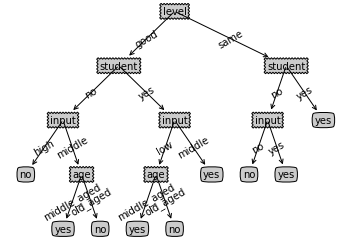

In [13]:
def getNumLeafs(myTree):
 '计算决策树的叶子数'
 
 # 叶子数
 numLeafs = 0
 # 节点信息
 sides = list(myTree.keys()) 
 firstStr =sides[0]
 # 分支信息
 secondDict = myTree[firstStr]
 
 for key in secondDict.keys(): # 遍历所有分支
  # 子树分支则递归计算
  if type(secondDict[key]).__name__=='dict':
   numLeafs += getNumLeafs(secondDict[key])
  # 叶子分支则叶子数+1
  else: numLeafs +=1
  
 return numLeafs
 
 
def getTreeDepth(myTree):
 '计算决策树的深度'
 
 # 最大深度
 maxDepth = 0
 # 节点信息
 sides = list(myTree.keys()) 
 firstStr =sides[0]
 # 分支信息
 secondDict = myTree[firstStr]
 
 for key in secondDict.keys(): # 遍历所有分支
  # 子树分支则递归计算
  if type(secondDict[key]).__name__=='dict':
   thisDepth = 1 + getTreeDepth(secondDict[key])
  # 叶子分支则叶子数+1
  else: thisDepth = 1
  
  # 更新最大深度
  if thisDepth > maxDepth: maxDepth = thisDepth
  
 return maxDepth
 
import matplotlib.pyplot as plt
 
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
 
# ==================================================
# 输入：
#  nodeTxt:  终端节点显示内容
#  centerPt: 终端节点坐标
#  parentPt: 起始节点坐标
#  nodeType: 终端节点样式
# 输出：
#  在图形界面中显示输入参数指定样式的线段(终端带节点)
# ==================================================
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
 '画线(末端带一个点)'
  
 createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
 
# =================================================================
# 输入：
#  cntrPt:  终端节点坐标
#  parentPt: 起始节点坐标
#  txtString: 待显示文本内容
# 输出：
#  在图形界面指定位置(cntrPt和parentPt中间)显示文本内容(txtString)
# =================================================================
def plotMidText(cntrPt, parentPt, txtString):
 '在指定位置添加文本'
 
 # 中间位置坐标
 xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
 yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
 
 createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)
 
# ===================================
# 输入：
#  myTree: 决策树
#  parentPt: 根节点坐标
#  nodeTxt: 根节点坐标信息
# 输出：
#  在图形界面绘制决策树
# ===================================
def plotTree(myTree, parentPt, nodeTxt):
 '绘制决策树'
 
 # 当前树的叶子数
 numLeafs = getNumLeafs(myTree)
 # 当前树的节点信息
 sides = list(myTree.keys()) 
 firstStr =sides[0]
 
 # 定位第一棵子树的位置(这是蛋疼的一部分)
 cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
 
 # 绘制当前节点到子树节点(含子树节点)的信息
 plotMidText(cntrPt, parentPt, nodeTxt)
 plotNode(firstStr, cntrPt, parentPt, decisionNode)
 
 # 获取子树信息
 secondDict = myTree[firstStr]
 # 开始绘制子树，纵坐标-1。  
 plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
  
 for key in secondDict.keys(): # 遍历所有分支
  # 子树分支则递归
  if type(secondDict[key]).__name__=='dict':
   plotTree(secondDict[key],cntrPt,str(key))
  # 叶子分支则直接绘制
  else:
   plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
   plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
   plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
  
 # 子树绘制完毕，纵坐标+1。
 plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
 
# ==============================
# 输入：
#  myTree: 决策树
# 输出：
#  在图形界面显示决策树
# ==============================
def createPlot(inTree):
 '显示决策树'
 
 # 创建新的图像并清空 - 无横纵坐标
 fig = plt.figure(1, facecolor='white')
 fig.clf()
 axprops = dict(xticks=[], yticks=[])
 createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
 
 # 树的总宽度 高度
 plotTree.totalW = float(getNumLeafs(inTree))
 plotTree.totalD = float(getTreeDepth(inTree))
 
 # 当前绘制节点的坐标
 plotTree.xOff = -0.5/plotTree.totalW; 
 plotTree.yOff = 1.0
 
 # 绘制决策树
 plotTree(inTree, (0.5,1.0), '')
 
 plt.show()
 
if __name__ == '__main__':
 data,features=load_data()
 split_fea_index=choose_best_to_split(data)
 newtree=build_decesion_tree(data,features)
 print(newtree)
 createPlot(newtree)
 '''
 {'age': {'old_aged': {'level': {'same': 'yes', 'good': 'no'}}, 'teenager': {'student': {'no': 'no', 'yes': 'yes'}}, 'middle_aged': 'yes'}}
 '''

